In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
image.shape


(744, 500, 3)

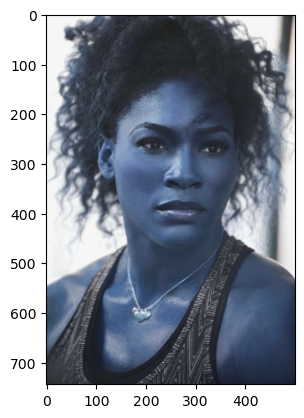

In [3]:
plt.imshow(image)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(744, 500)

In [5]:
gray

array([[246, 246, 246, ..., 130, 156, 171],
       [246, 246, 246, ..., 135, 161, 176],
       [246, 246, 246, ..., 141, 166, 180],
       ...,
       [ 44,  44,  45, ...,  34,  34,  34],
       [ 43,  44,  44, ...,  34,  34,  34],
       [ 43,  43,  44, ...,  35,  35,  35]], dtype=uint8)

array([[246, 246, 246, ..., 130, 156, 171],
       [246, 246, 246, ..., 135, 161, 176],
       [246, 246, 246, ..., 141, 166, 180],
       ...,
       [ 44,  44,  45, ...,  34,  34,  34],
       [ 43,  44,  44, ...,  34,  34,  34],
       [ 43,  43,  44, ...,  35,  35,  35]], dtype=uint8)

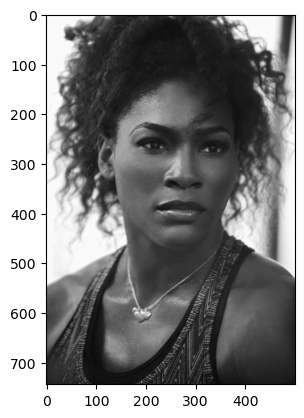

In [6]:
#observing the gray image 
plt.imshow(gray, cmap='gray')
gray

In [7]:
#identifying the position of face 
face_cascade = cv2.CascadeClassifier('C:\\Users\\AJINKYA\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\\Users\\AJINKYA\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces 
#print(*faces)

#cv2.imshow("gray", gray)
#cv2.waitKey(0)

array([[102, 135, 329, 329]])

#Check
img = cv2.imread('C:\\Users\\AJINKYA\\Desktop\\13_Self_Projects\\Model\\test_images\\mariatest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(*faces)

for(x, y, w, h) in faces:
    cv2.rectangle(img(x,y), (x+w, y+h), (255, 0, 0), 2)
    
cv2.imshow("img", img)
cv2.waitKey(0)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(102, 135, 329, 329)

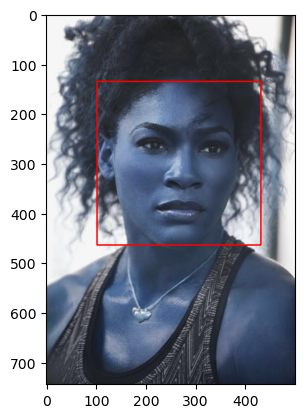

In [9]:
#Face detection 
face_image = cv2.rectangle(image,(x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_image)

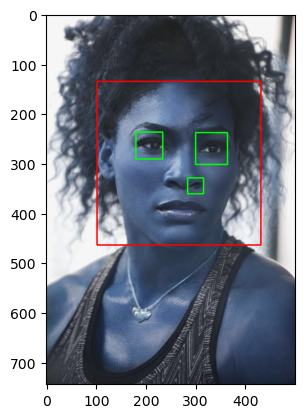

In [10]:
cv2.destroyAllWindows()

for(x,y,w,h) in faces:
    face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_image, cmap='gray')
plt.show()
    

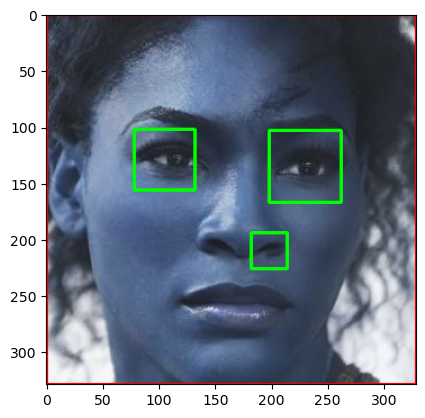

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        

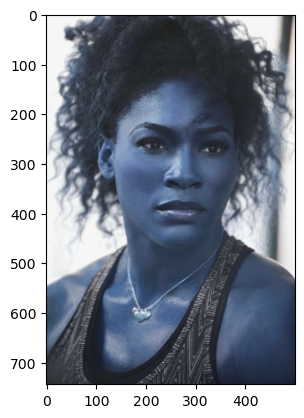

In [13]:
original_image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
plt.imshow(original_image)

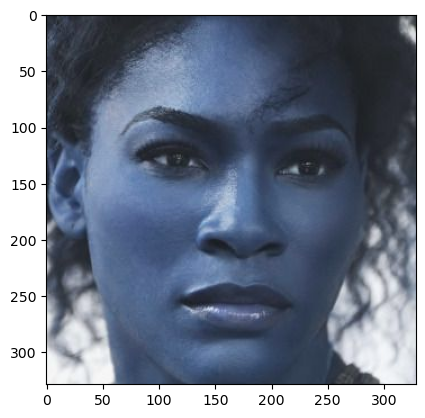

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
plt.imshow(cropped_image)

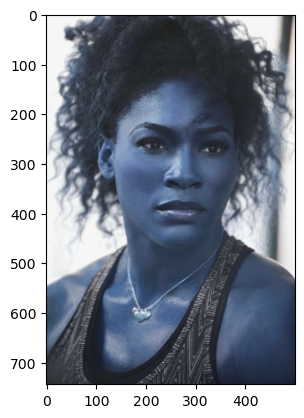

In [15]:
obstructed_image = cv2.imread('./Desktop/SelfProjects/Model/testimages/serenatest.jpg')
plt.imshow(obstructed_image)

In [16]:
get_cropped_image_if_2_eyes = get_cropped_image_if_2_eyes('./Desktop/SelfProjects/Model/testimages/serenatestsecond.jpg')
get_cropped_image_if_2_eyes

#output did not come as image is obstructed

In [17]:
path_to_data = "./Desktop/SelfProjects/Model/dataset/"
path_to_cr_data = "./Desktop/SelfProjects/Model/dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    


In [19]:
img_dirs

['./Desktop/SelfProjects/Model/dataset/lionel_messi',
 './Desktop/SelfProjects/Model/dataset/maria_sharapova',
 './Desktop/SelfProjects/Model/dataset/roger_federer',
 './Desktop/SelfProjects/Model/dataset/serena_williams',
 './Desktop/SelfProjects/Model/dataset/virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli
